# Fundamentals of visualisation, part 2

## This script contains the following:

### 1. Import libraries and data

### 2. Set theme

### 3. Create bar chart of top 20 starting stations

### 4. Recreate dual axis line chart from previous exercise

### 5. Box plot

### 6. Facet grid

### 1. Import libraries and data

In [39]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [40]:
# import data

df = pd.read_csv('Chicago_data.csv', index_col = 0)

In [41]:
df.shape

(3603082, 15)

In [42]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,date,avgTemp,_merge
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,2018-01-01,-18.9,both
1,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,2018-01-01,-18.9,both
2,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,2018-01-01,-18.9,both
3,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,2018-01-01,-18.9,both
4,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,2018-01-01,-18.9,both


In [43]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
date                  object
avgTemp              float64
_merge                object
dtype: object

In [44]:
# drop _merge column

df.drop(columns = {'_merge'}, inplace = True)

### 2. Set theme

In [45]:
sns.set_theme(style = 'white', palette = 'autumn')

### 3. Create bar chart of top 20 starting stations

In [46]:
# set all values in the 'Value' column of dataframe to 1

df['value'] = 1

In [47]:
df_t = df.groupby('from_station_name')['value'].count().reset_index()

In [48]:
df_t

,from_station_name,value
0,2112 W Peterson Ave,456
1,63rd St Beach,956
2,900 W Harrison St,6187
3,Aberdeen St & Jackson Blvd,12056
4,Aberdeen St & Monroe St,9875
...,...,...
617,Wood St & Taylor St,5987
618,Woodlawn Ave & 55th St,3488
619,Woodlawn Ave & 75th St,30
620,Woodlawn Ave & Lake Park Ave,1010


In [49]:
top20 = df_t.nlargest(20, 'value')

top20

,from_station_name,value
547,Streeter Dr & Grand Ave,66944
83,Canal St & Adams St,62654
146,Clinton St & Madison St,51692
150,Clinton St & Washington Blvd,48669
399,Michigan Ave & Washington St,38029
326,Lake Shore Dr & Monroe St,36174
152,Columbus Dr & Randolph St,35342
310,Kingsbury St & Kinzie St,34589
86,Canal St & Madison St,34188
169,Daley Center Plaza,33968


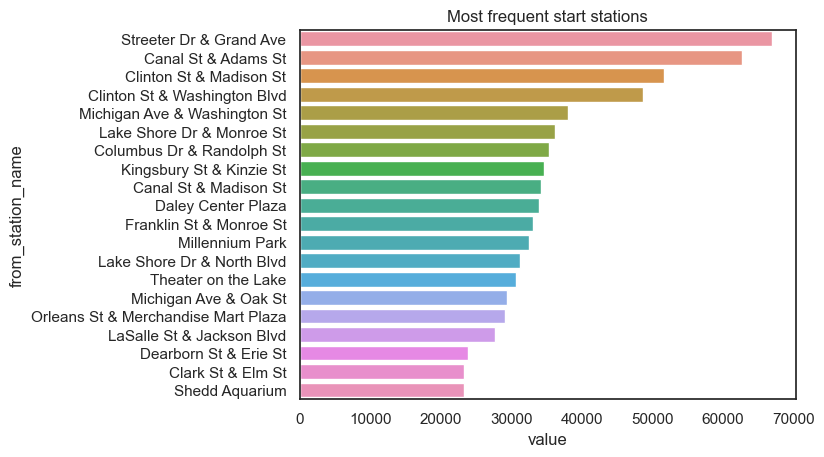

In [50]:
sns.barplot(data = top20, x = 'value', y = 'from_station_name')

""" Create bar chart using top 20 starting stations """

plt.title('Most frequent start stations')
plt.show()

As Seaborn palettes only features 12 colours by default, it is unable to use the set palette on this 20 value bar chart. Therefore, I will temporarily change the set theme for this bar chart and tell seaborn that there are 20 colours required so that it can use the appropriate number of shades for my bar chart.

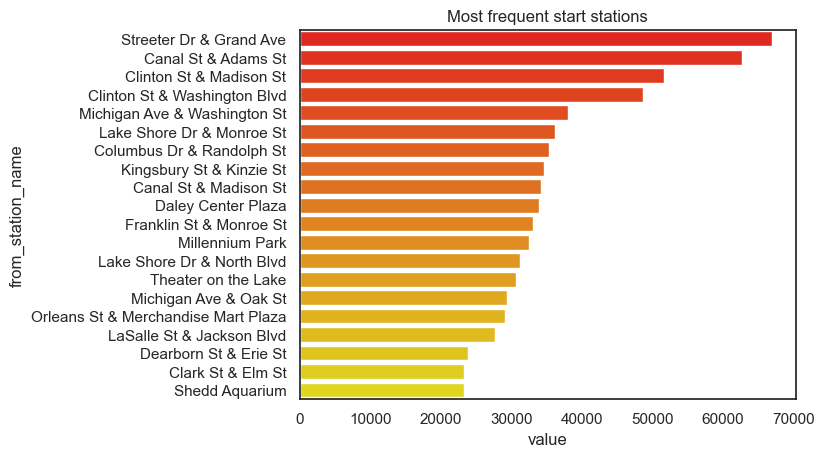

In [51]:
sns.barplot(data = top20, x = 'value', y = 'from_station_name', palette=('autumn'))

""" Change number of shades in palette for this bar chart only """

plt.title('Most frequent start stations')
plt.show()

### 4. Recreate dual axis line chart from previous exercise

In [52]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [53]:
# groupby the count of the bike trips 

df_group = pd.DataFrame(df.groupby(['date'])['trip_id'].count()).reset_index()

In [54]:
df_group.head()

,date,trip_id
0,2018-01-01,376
1,2018-01-02,1637
2,2018-01-03,2493
3,2018-01-04,2416
4,2018-01-05,2228


In [55]:
# merge df_group with df to create df_temp

df_group.rename(columns = {'trip_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')

""" merge df with df_group """

print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

""" set index as 'date' to create df_temp """

print(df_temp.columns)

both          3603082
left_only           0
right_only          0
Name: merge_flag, dtype: int64
Shape of January 1st is (376, 17)
Shape of January 2nd is (1637, 17)
Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'avgTemp',
       'value', 'bike_rides_daily', 'merge_flag'],
      dtype='object')


In [56]:
df_temp.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,avgTemp,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,
2018-01-01,17536702,2018-01-01 00:12:00,2018-01-01 00:17:23,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0,-18.9,1,376,both
2018-01-01,17536703,2018-01-01 00:41:35,2018-01-01 00:47:52,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0,-18.9,1,376,both
2018-01-01,17536704,2018-01-01 00:44:46,2018-01-01 01:33:10,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0,-18.9,1,376,both
2018-01-01,17536705,2018-01-01 00:53:10,2018-01-01 01:05:37,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0,-18.9,1,376,both
2018-01-01,17536706,2018-01-01 00:53:37,2018-01-01 00:56:40,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0,-18.9,1,376,both


In [57]:
df_temp.shape

(3603082, 16)

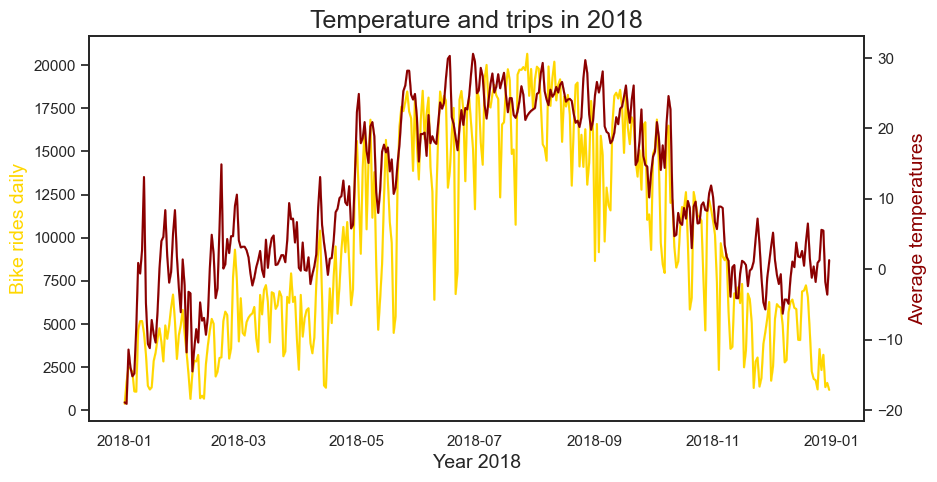

In [58]:
# create dual axis line plot

fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = 'gold')
ax.set_xlabel('Year 2018', fontsize = 14)
ax.set_ylabel('Bike rides daily',color = 'gold', fontsize = 14) 

""" create axis 1 showing data for bike rides daily """

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color='darkred', ax=ax2)
ax2.set_ylabel('Average temperatures', color = 'darkred',fontsize=14)
plt.title('Temperature and trips in 2018', fontsize = 18)

""" create axis 2 showing data for average temperatures """

plt.show()

### 5. Box plot

In [59]:
# create age variable

In [60]:
df_temp['birthyear'].head()

date
2018-01-01    1988.0
2018-01-01    1984.0
2018-01-01    1989.0
2018-01-01    1983.0
2018-01-01    1989.0
Name: birthyear, dtype: float64

In [61]:
df_temp.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               562505
birthyear            555209
avgTemp                   0
value                     0
bike_rides_daily          0
merge_flag                0
dtype: int64

In [62]:
df_temp['birthyear'].fillna(df_temp['birthyear'].median(), inplace = True)

In [63]:
df_temp.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               562505
birthyear                 0
avgTemp                   0
value                     0
bike_rides_daily          0
merge_flag                0
dtype: int64

In [64]:
df_temp['year_of_birth'] = df_temp['birthyear'].astype(int)

In [65]:
df_temp['year_of_birth'].head()

date
2018-01-01    1988
2018-01-01    1984
2018-01-01    1989
2018-01-01    1983
2018-01-01    1989
Name: year_of_birth, dtype: int32

In [66]:
df_temp['year_of_birth_2'] = pd.to_datetime(df_temp['year_of_birth'], format = '%Y')

In [67]:
# create age column

def calculate_age(birthyear):

    """ find age as of today from birth year """
    
    today = dt.today()
    return today.year - birthyear.dt.year

In [68]:
df_temp['age'] = calculate_age(df_temp['year_of_birth_2'])

In [69]:
df_temp['age'].head()

date
2018-01-01    36
2018-01-01    40
2018-01-01    35
2018-01-01    41
2018-01-01    35
Name: age, dtype: int64

<Axes: xlabel='usertype', ylabel='age'>

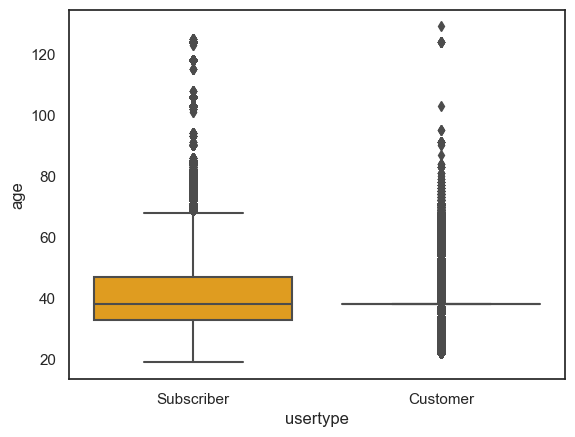

In [70]:
# create a box plot

sns.boxplot(x = 'usertype', y = 'age', data = df_temp, palette = {'Subscriber' : 'orange', 'Customer' : 'gold'})

In [71]:
# check ages

df_temp['age'].value_counts()

38     683123
35     179184
32     172436
34     171490
33     166865
        ...  
123         2
101         2
129         1
87          1
19          1
Name: age, Length: 84, dtype: int64

There are either some very elderly people hiring bikes in Chicago or some erroneous ages! I will exclude everyone aged 100 or over and run the box plot again.

In [72]:
# subset data for box plot

""" create subset excluding ages 100 or over """

df_temp_sub = df_temp.loc[(df_temp['age'] <=100)]

<Axes: xlabel='usertype', ylabel='age'>

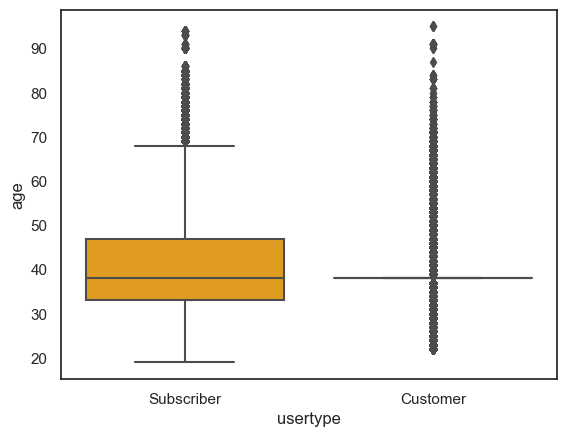

In [73]:
# create a box plot with subset

sns.boxplot(x = 'usertype', y = 'age', data = df_temp_sub, palette = {'Subscriber' : 'orange', 'Customer' : 'gold'})

Although creating a subset made the ages of the hirers more realistic, it hasn't really changed the result of the data at all. The interquartile range for subscribers is roughly between 33 and 48 years old, with the whiskers of the plot ranging from 20 to 70. Even having removed the highest ages from the data, there are still many outliers. As the median is lower than the middle of the box, we can tell that the distribution is skewed towards the younger end of the age range, with the median age around 39 years old.

The customer data is almost entirely outliers! There is no real box, just a median line in almost the same place as the subscriber's. 

Subscribers are largely made up of those who fall in the 'working age' range and are likely to be those who commute regularly, making a subscription more cost effective. Non-subscribers ('customers') are those who only need to hire a bike on occasion, without having a regular need to do so. Therefore non-subscribers could be any age, although they are more likely to be younger rather than older, as we can tell by where the median can be found.

### 6. Facet grid

In [84]:
# create age group variable

""" create a flag to show all equal to or over 40s as 'older' """

df_temp.loc[df_temp['age'] >=40, 'age_group'] = 'older'

In [86]:
""" create a flag to show all aged below 40 as 'younger' """

df_temp.loc[df_temp['age'] <40, 'age_group'] = 'younger'

In [88]:
df_temp['age_group'].value_counts()

younger    2255112
older      1347970
Name: age_group, dtype: int64

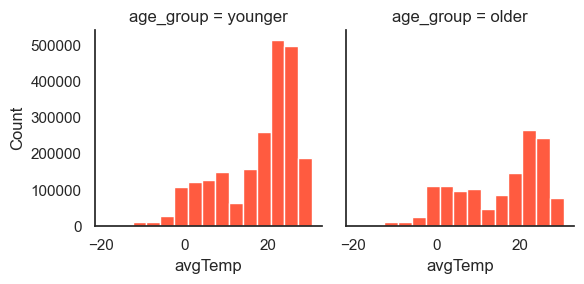

In [87]:
grid = sns.FacetGrid(df_temp, col = 'age_group')
grid.map(sns.histplot, 'avgTemp', bins = 15)
plt.show()

Although the 'older' age group is almost half the size of the 'younger' one, it is still clear to see that both groups made similar temperature-related decisions when choosing whether to hire a bike. Very few from either group chose to hire a bike when temperatures were below 0°C, but once temperatures rose to between approximately 0°C and 14°C, take-up increased dramatically. Both groups saw a dip around 16°C, before both also saw a rise of around 50% in the 'younger' age group and slightly less in the 'older' age group around the 22/24°C mark. Until this point, the difference between each group had been reasonable negligible, but temperatures between about 20 and 25°C saw around double the number of younger people hiring bikes than older people, before both groups saw a dramatic fall in take up above those temperatures.